<a href="https://colab.research.google.com/github/boddgane/Image-Classification-Model-development/blob/main/Intel_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Packages**
For to do classification task using neural network we need several packages including numpy, pandas, matplotlib and seaborn. And also needed important packages like keras and scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

#**Data Preparation**
The goal of data preparation is to prepare data that are ready to be applied in NN models.














In [7]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [8]:
!unzip -q /content/drive/MyDrive/mydataset.zip -d ../

In [9]:
train_dataset_path = '/seg_train/seg_train/'
validation_dataset_path = '/seg_test/seg_test/'

In [10]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 14034 images belonging to 6 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 3000 images belonging to 6 classes.


In [12]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


#**Plotting sample training examples**
Here I am taking some of the training examples and plotting.

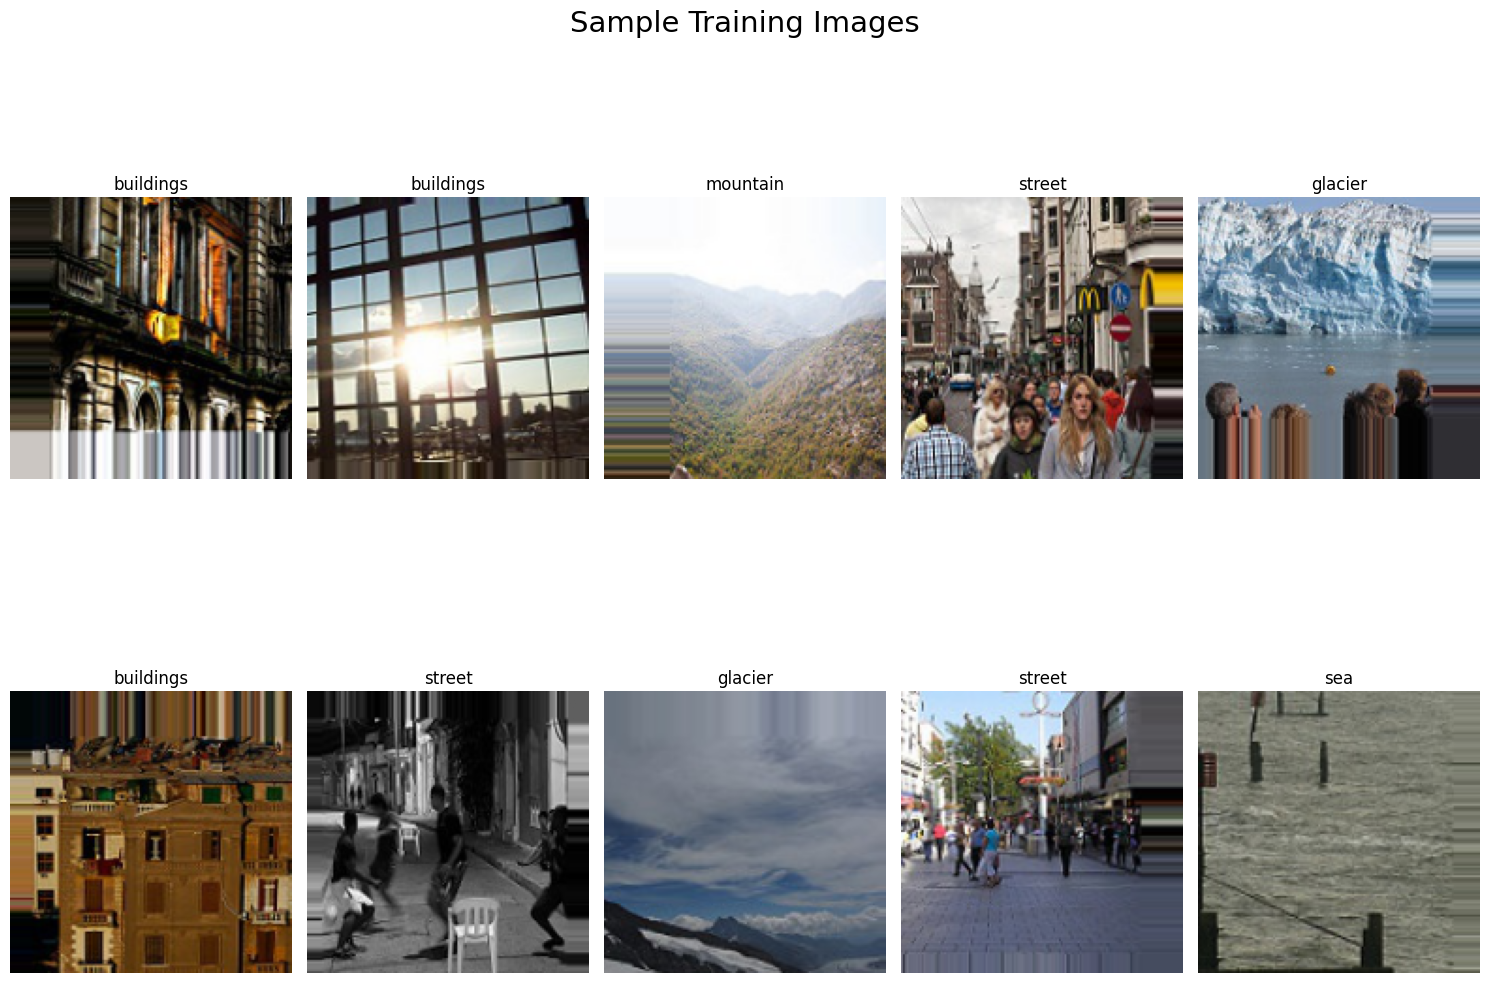

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

#**Training a CNN Model**
Will create a model to train on image datasets.

**CNN model creation**

In [14]:
def create_model():
    model = Sequential([
        Conv2D(filters=32, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        Conv2D(filters=32, kernel_size=(5, 5), padding='valid'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid'),
        Activation('relu'),
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=128, kernel_size=(3, 3), padding='valid'),
        Activation('relu'),
        Conv2D(filters=128, kernel_size=(3, 3), padding='valid'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.2),
        Dense(units=6, activation='softmax')
    ])

    return model

In [15]:
cnn_model = create_model()


**Defining Callbacks**:
A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)


**Defining the Optimizer**

In [17]:
optimizer = Adam(learning_rate=0.001)

**Compile the Model**

In [18]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])



**Training the Model**

In [19]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50
439/439 - 120s - loss: 1.9039 - accuracy: 0.5108 - val_loss: 1.2975 - val_accuracy: 0.5040 - lr: 0.0010 - 120s/epoch - 273ms/step
Epoch 2/50
439/439 - 101s - loss: 0.9564 - accuracy: 0.6401 - val_loss: 1.0772 - val_accuracy: 0.6227 - lr: 0.0010 - 101s/epoch - 231ms/step
Epoch 3/50
439/439 - 104s - loss: 0.8227 - accuracy: 0.6979 - val_loss: 0.8988 - val_accuracy: 0.6817 - lr: 0.0010 - 104s/epoch - 238ms/step
Epoch 4/50
439/439 - 102s - loss: 0.7383 - accuracy: 0.7306 - val_loss: 1.0274 - val_accuracy: 0.6713 - lr: 0.0010 - 102s/epoch - 232ms/step
Epoch 5/50
439/439 - 102s - loss: 0.6945 - accuracy: 0.7519 - val_loss: 0.7039 - val_accuracy: 0.7410 - lr: 0.0010 - 102s/epoch - 233ms/step
Epoch 6/50
439/439 - 99s - loss: 0.6367 - accuracy: 0.7732 - val_loss: 0.6030 - val_accuracy: 0.7823 - lr: 0.0010 - 99s/epoch - 226ms/step
Epoch 7/50
439/439 - 100s - loss: 0.5974 - accuracy: 0.7838 - val_loss: 0.7031 - val_accuracy: 0.7693 - lr: 0.0010 - 100s/epoch - 227ms/step
Epoch 8/50
439/

**Plotting the Model Metrics**

In [20]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

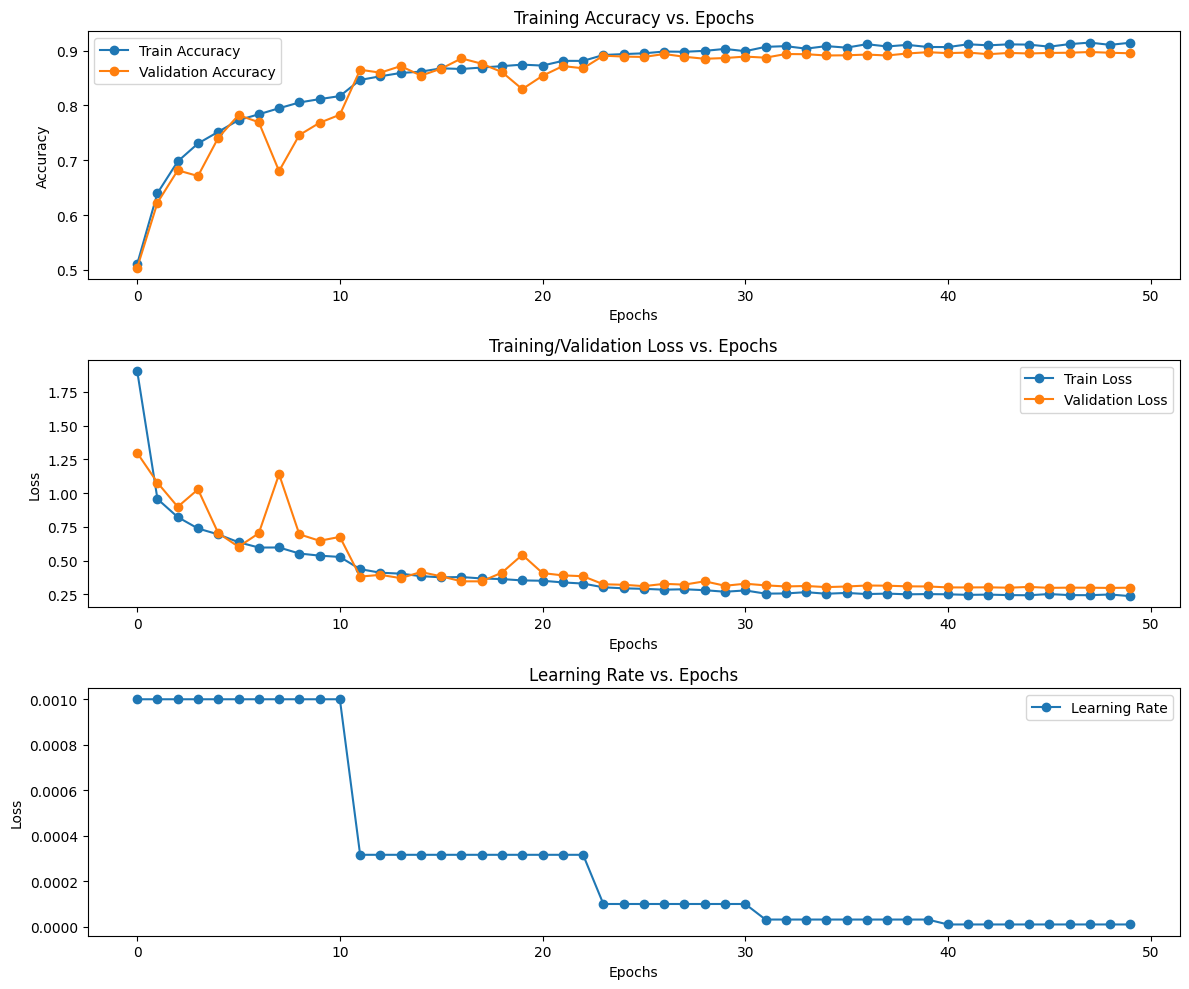

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

**Testing the Model on Test Set**

In [22]:
test_dataset = '/seg_test/seg_test/'

In [23]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 3000 images belonging to 6 classes.


**Model Prediction on the Test Dataset**


In [24]:
predictions = cnn_model.predict(test_generator)


94/94 [==============================] - 4s 42ms/step


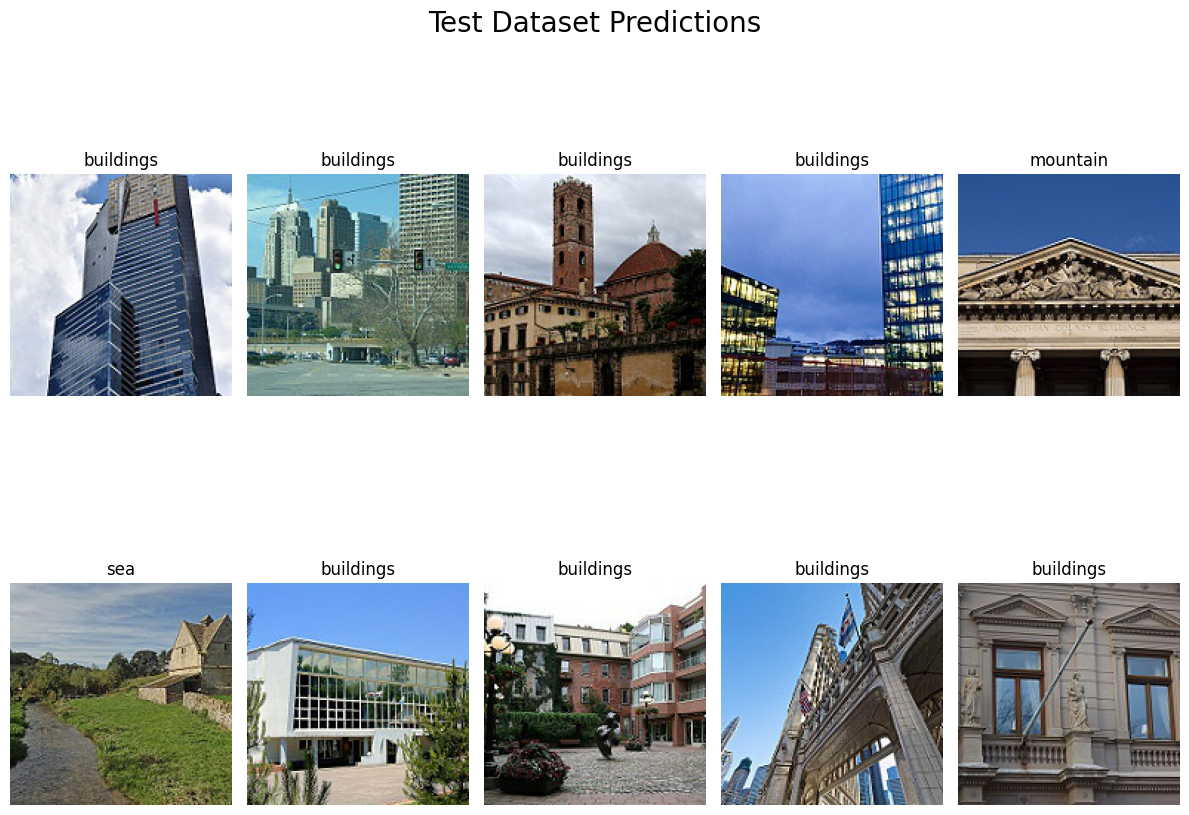

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()


In [26]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

94/94 [==============================] - 5s 56ms/step - loss: 0.3003 - accuracy: 0.8950


In [27]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.30032405257225037
Test Accuracy: 0.8949999809265137


**Confusion Matrix**

In [28]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

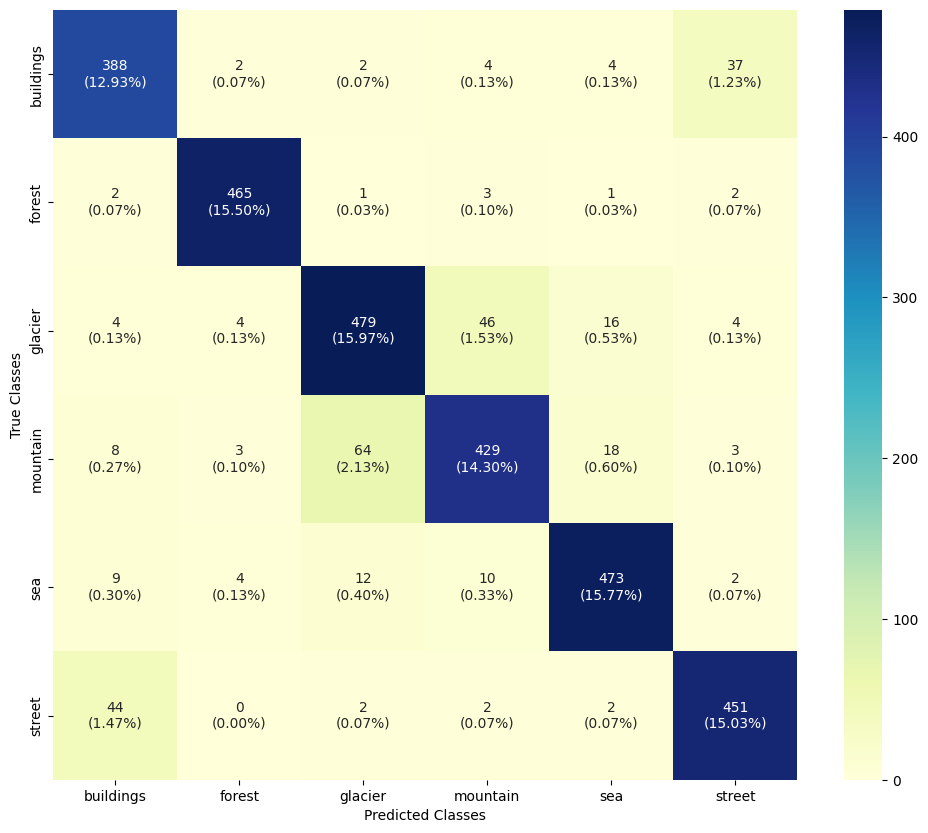

In [29]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [30]:
print(classification_report(y_true, y_pred, target_names=labels.values()))


              precision    recall  f1-score   support

   buildings       0.85      0.89      0.87       437
      forest       0.97      0.98      0.98       474
     glacier       0.86      0.87      0.86       553
    mountain       0.87      0.82      0.84       525
         sea       0.92      0.93      0.92       510
      street       0.90      0.90      0.90       501

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.89      0.90      0.89      3000



**Wrong predictions**
Let's see where the model has given wrong predictions and what were the actual predictions on those images

In [31]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [32]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

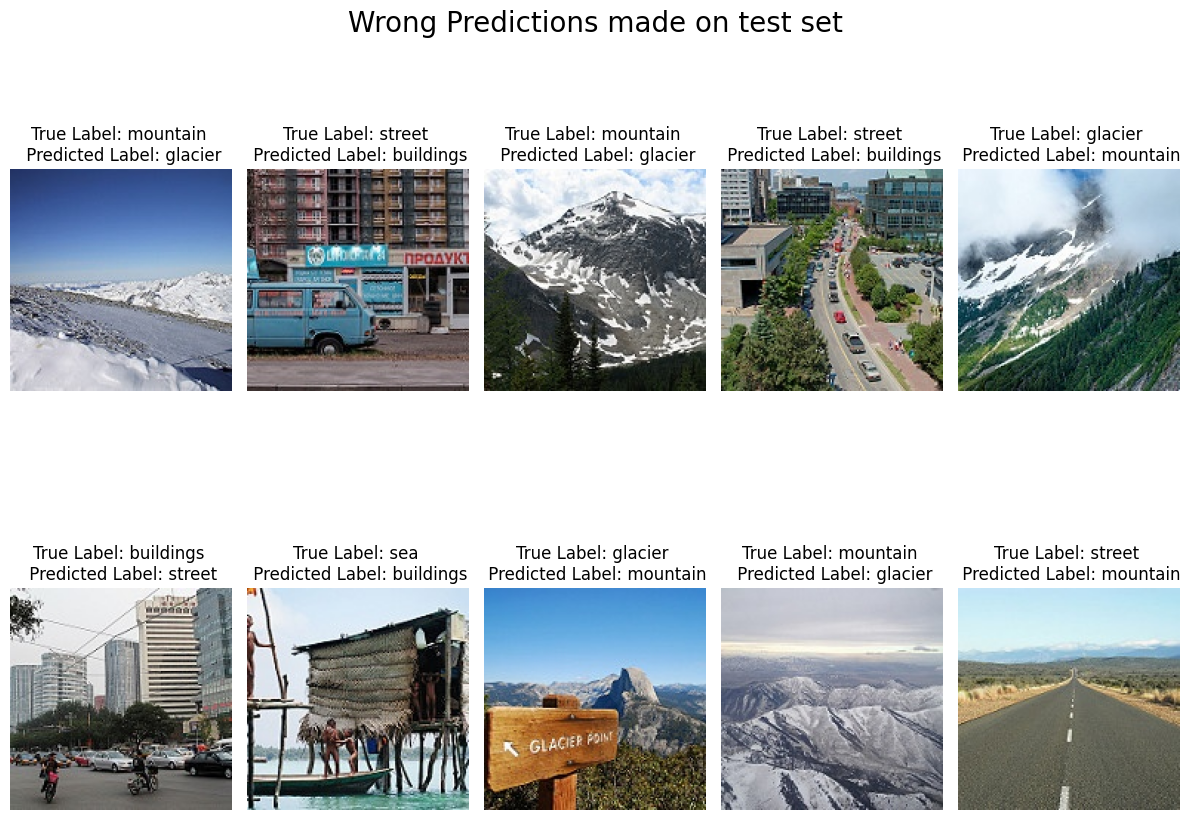

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

**Saving the Model**

In [34]:
cnn_model.save("/content/drive/MyDrive/saved_model_24th_july/model.keras")